# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 1

**Правила:**

* Выполненную работу нужно отправить телеграм-боту, адрес которого будет указан на странице курса до конца недели. Обращаем ваше внимание, что в боте необходимо заранее зарегистрироваться и дождаться подтверждения.
* Дедлайн **20 февраля в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины с подтверждающими документами.
* Прислать нужно ноутбук в формате `ipynb` 
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.

-----

In [114]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
pd.options.mode.chained_assignment = None
%matplotlib inline

Для выполнения задания вы можете установить свою палитру цветов при отрисовке графиков с помощью кода ниже. Если введете несуществующее имя, то вам напечатается список возможных палитр. Также вы можете устанавливать свои цвета конкретным объектам на графиках, обычно это делается с помощью аргумента `color`.

In [2]:
sns.set_palette('Set2')

### Задача 1

Для выполнения задания выберите любой профиль, в течении 1-2 недель его можно поменять. Студенты кафедры инновационная педагогика выполняют задание по профилю педагогика.

**Профиль биология**

Скачайте <a href="https://www.kaggle.com/ruslankl/mice-protein-expression
">датасет</a> с данными об экспрессии белков у белых мышей. Данный датасет состоит из таблицы значений уровней экспрессии 77 различных белков в мозге у мышей. Каждая строка соответствует одной особи, каждый столбец соответствует одному белку. На столбцы Genotype, Treatment и подобные пока не обращаем внимания. 

Для исследования рекомендуется выбрать столбцы 'ITSN1_N', 'DYRK1A_N', 'pBRAF_N', 'pCREB_N', но можно взять и другие.

**Профиль физика**

Скачайте <a href="https://www.kaggle.com/fedesoriano/cern-electron-collision-data
">датасет</a> с данными о столкновении электронов на Большом Адронном Коллайдере. 

Данный датасет  содержит информацию о событиях столкновения двух электронов. Он состоит из таблицы различных параметров столкновений. Каждая строка соответствует одному столкновению, каждый столбец соответствует одному параметру. Например, в столбцах E1, E2 записаны значения энергии сталкивающихся электронов, в столбцах px1, py1, pz1, px2, py2, pz2 — значения моментов импульса, в столбцах Q1, Q2 $-$ заряды электронов.

Для исследования рекомендуется выбрать столбцы 'E2', 'px2', 'eta2', 'phi2'. Все эти столбцы — некоторые параметры второго электрона. Можно взять и другие столбцы.

**Профиль педагогика**

Скачайте <a href="https://www.kaggle.com/spscientist/students-performance-in-exams
">датасет</a> с данными о результатах учащихся на экзаменах.

Данный датасет состоит из таблицы баллов учащихся на экзаменах по математике, чтению и письму, а также дополнительной информации о студентах. Каждая строка соответствует одному учащемуся, каждый столбец соответствует одному признаку. В столбцах math score, reading score и writing score записаны баллы за экзамены.

Для исследования возьмите столбцы 'math score', 'reading score', 'writing score'.

----

Чтобы скачать данные, зарегистрируйтесь на сайте, после нажмите download на странице датасета и распакуйте скачанный архив. Вы получите файл формата `csv`.

Если вы работаете в Google Colab, можно загрузить полученный файл в разделе "Файлы" (значок папки) на левой панели.

In [3]:
# эта функция читает данные, в кавычках укажите путь к файлу на вашем компьютере или в Colab
df = pd.read_csv("./archive/dielectron.csv")
#df = pd.read_csv("./dielectron.csv")
#df = pd.read_csv("./StudentsPerformance.csv")

Посмотрим на первые строки этой таблицы.

In [4]:
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


Выберите несколько (3-6) столбцов для анализа значений в них.

In [115]:
# укажите столбцы данных 
# Пример: columns = ['math score', ...]
columns = ['E1','px2','eta2','phi2']

df_chosen_columns = df[columns]

#Одномерный массив значений одного признака (например, 'math score') можно получить так:
#df_chosen_columns['math score']

#### Гистограммы

Для каждого из выбранных признаков нарисуйте гистограмму распределения. Для этого воспользуйтесь функцией `matplotlib.pyplot.hist`.

*Примечание.* В анализе данных обычно используется слово "признак" для обозначения исследуемого свойства объекта. Например, для биологического датасета признаком является белок.


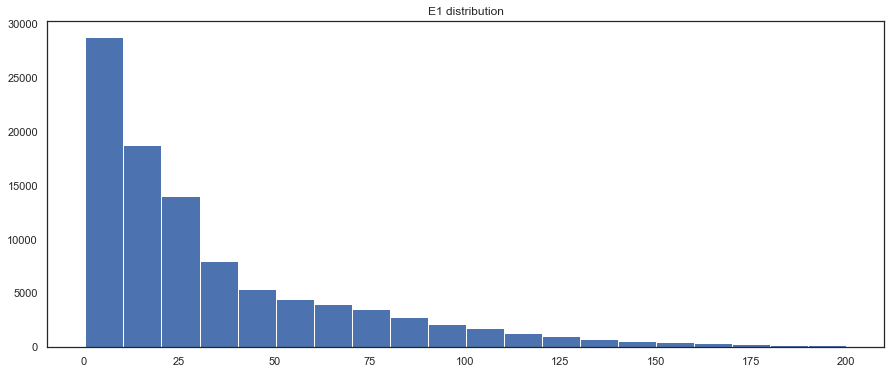

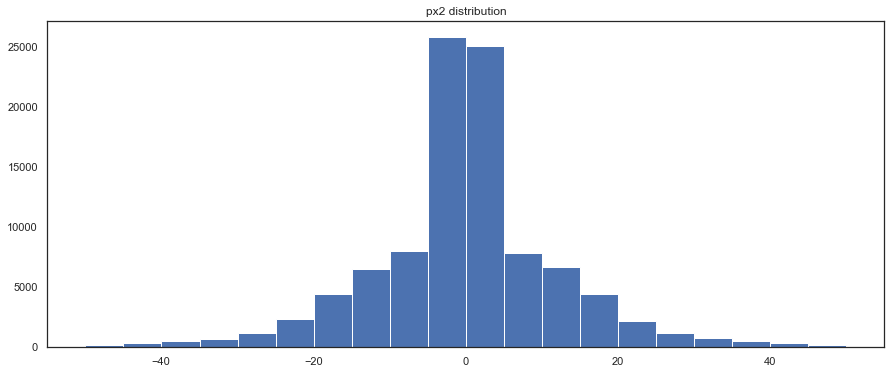

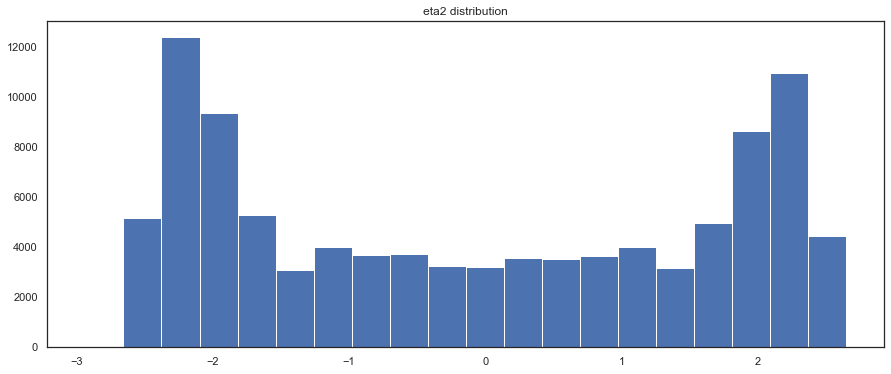

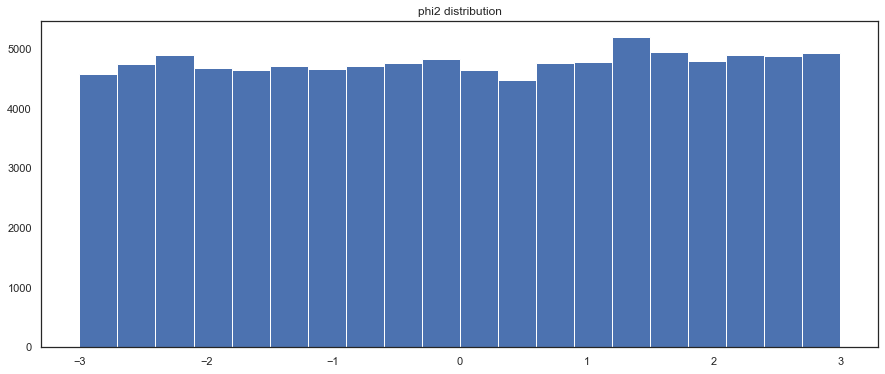

In [218]:
for i, column in enumerate(columns):
    plt.figure(figsize=(15, 6))
    
    plt.hist(df_chosen_columns[column], bins=20)
    plt.title(column + ' distribution');
    

Выбросы — значения, которые сильно отличаются от большинства значений выборки. Они могут возникать из-за ошибки измерения, из-за необычной природы входных данных, но также могут быть и частью распределения.

По гистограммам предположите, в каких из исследуемых признаков могут быть выбросы?

**Ответ: Думаю, выбросы есть во всех признаках, кроме последнего**

Выбросы могут сильно портить внешний вид графика.

Продемонстрируем это на примере. Сгенерируем выборку размера 1000 из стандартного нормального распределения и построим по ней гистограмму. В библиотеке `scipy` это можно сделать с помощью метода `rvs`

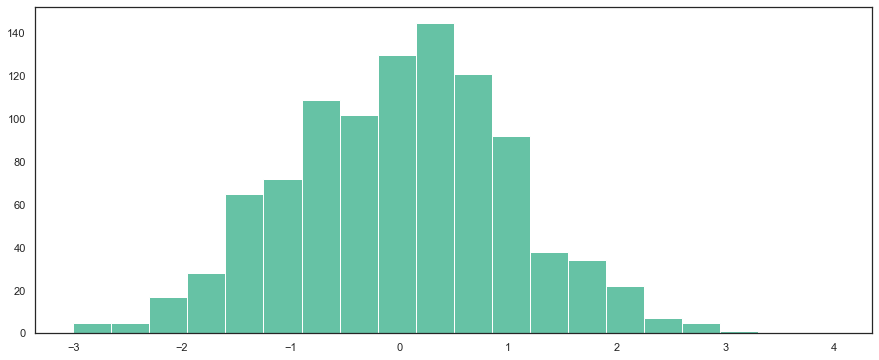

In [9]:
sample = sps.norm.rvs(size=1000)

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

Как видим, большая часть значений находятся в промежутке от -3 до 3.

Теперь добавим выброс — очень большое значение, которое могло появиться, например, в результате ошибок измерения. Допустим, что выброс — первое измерение.

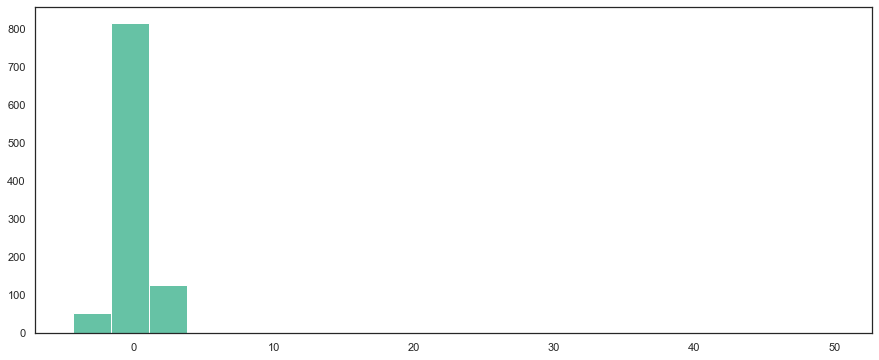

In [24]:
outlier = 50
sample[0] = outlier

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20);

По такому графику уже нельзя сделать предположение о распределении выборки.
Также обратите внимание, что большая часть графика пустая, что говорит о неинформативности данного графика.

Эту проблему с графиками можно решить с помощью параметра `range`, который определяет, в каких границах строится гистограмма.

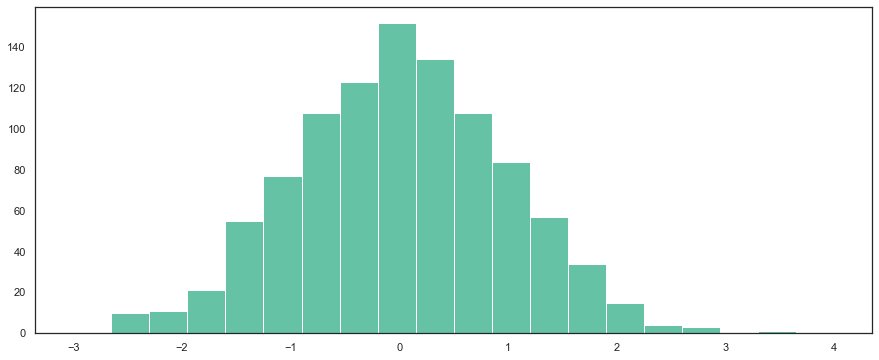

In [14]:
plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

Проделайте то же самое с теми столбцам, в которых, как вы считаете, есть выбросы.

В словаре `ranges_without_outliers` укажите, в каких пределах, по вашему мнению, стоит нарисовать гистограмму распределения для каждого признака.

Пример заполнения словаря на ячейке ниже. 

Здесь мы считаем, что для признака `column1` большая часть значений находится в промежутке от -1 до 5, а все значения за пределами этого промежутка — выбросы.
Мы хотим нарисовать информативный график для гистограммы значений признака `column1`, поэтому гистограмму будем строить только на основе значений из промежутка (-1, 5)

Аналогично для признака `column2`

In [ ]:
ranges_without_outliers_example = {
    'column1' : (-1, 5),
    'column2' : (0, 3)
}

Аналогично определите интервалы для исследуемых признаков

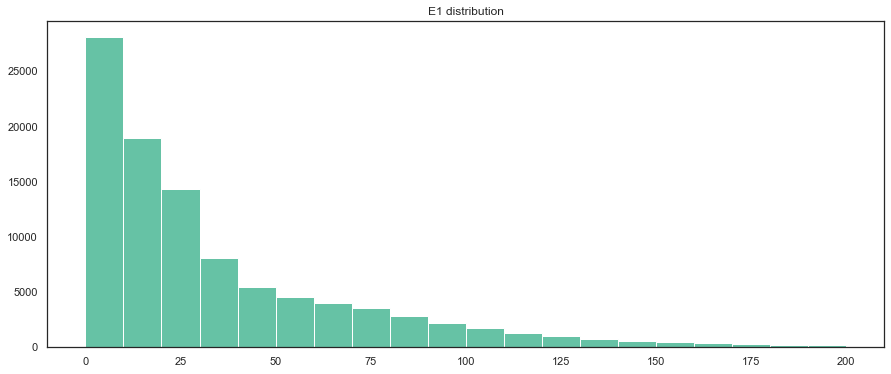

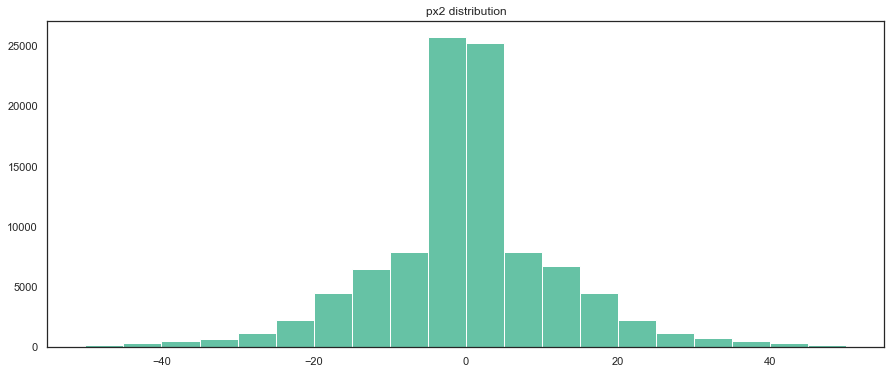

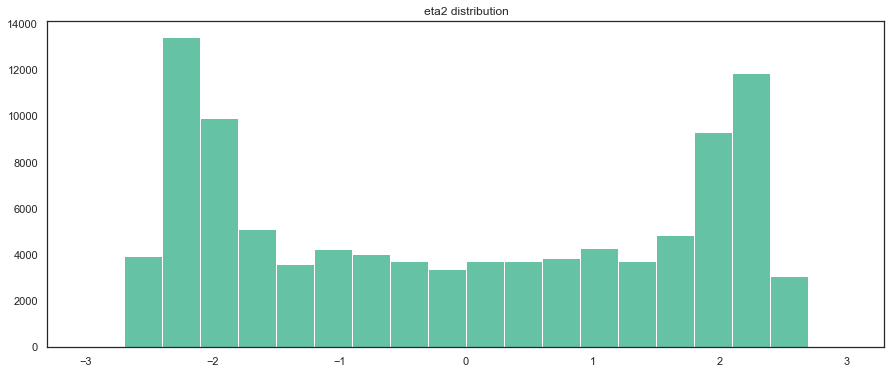

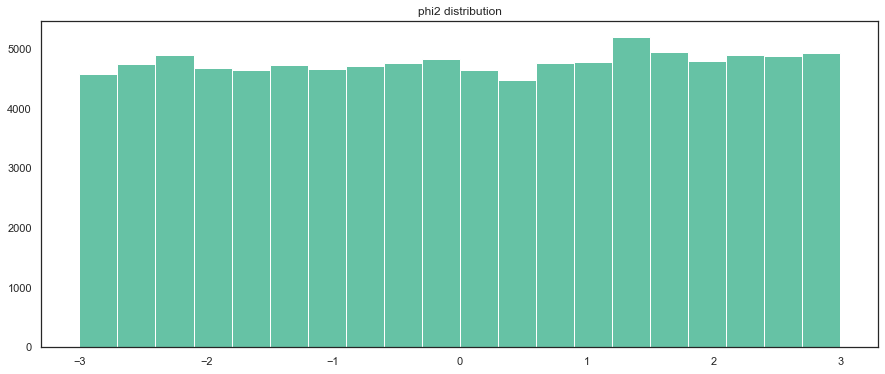

In [14]:
ranges_without_outliers = {
    'E1' : (0, 200),
    'px2' : (-50, 50),
    'eta2' : (-3,3),
    'phi2' : (-3,3)
}


for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    plt.hist(df_chosen_columns[column], range=column_range, bins=20)
    plt.title(column + ' distribution')

**Сделайте выводы** 

Изменилась ли форма распределений, стали ли графики информативнее?

**Ответ: Графики стали намного информативнее, после отброса 'выбросов' стали видны их истинные формы**

#### Ядерные оценки плотности

Иногда гистограммы недостаточно, чтобы понять, какое у распределение у элементов выборки. В таких случаях можно использовать ядерные оценки плотности. 

В библиотеке `seaborn` они представлены функциями `distplot` (в версиях до `0.11.1`), `kdeplot` (начиная с версии `0.11.1`)

In [19]:
sns.__version__

'0.11.2'

Пример для нормального распределения с выбросом.

<AxesSubplot:ylabel='Density'>

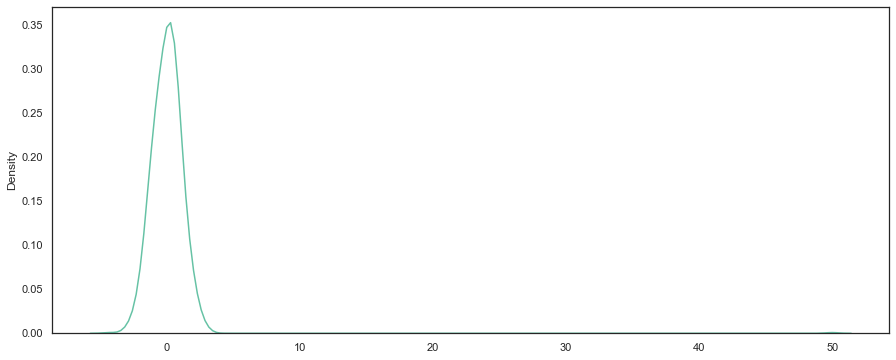

In [25]:
plt.figure(figsize=(15, 6))
sns.kdeplot(sample)

Видно, что, даже несмотря на "хвост", плотность основной части данных довольно похожа на плотность нормального распределения. Теперь нарисуем этот же график для выборки без выброса.

Для наглядности на этом же графике нарисуем плотность стандартного нормального распределения. В библиотеке `scipy` плотность распределения называется `pdf`.

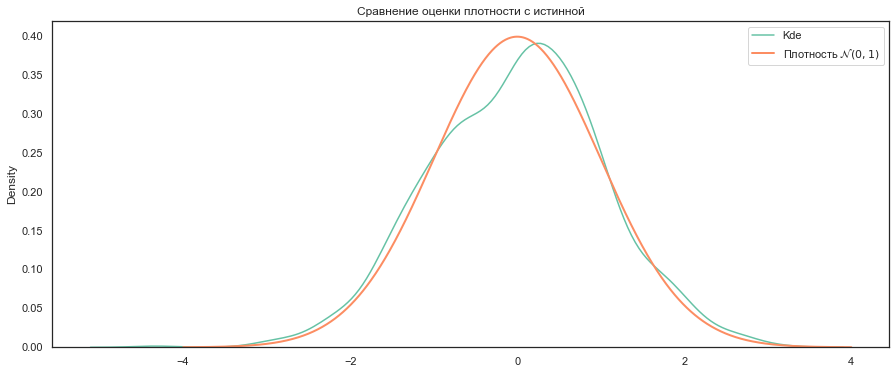

In [30]:
# уберем выброс
sample_wo_ourliers = sample[1:]

# сетка от -4 до 4 из 1000 значений
grid = np.linspace(-4, 4, 1000)
# считаем значения функции в выборке
norm_pdf_values = sps.norm.pdf(grid)

# отрисовка графика
plt.figure(figsize=(15, 6))
sns.kdeplot(sample_wo_ourliers, label = 'Kde')
plt.plot(grid, norm_pdf_values, label='Плотность $\\mathcal{N}(0,1)$', lw=2)
plt.title('Сравнение оценки плотности с истинной')
plt.legend();

Однако ядерные оценки плотности тоже не универсальны.
Рассмотрим пример экспоненциального распределения.

Сгенерируйте выборку размера 100 из экспоненциального распределения $\textit{Exp(1)}$. Для этого воспользуйтесь функцией `sps.expon.rvs`.

[]

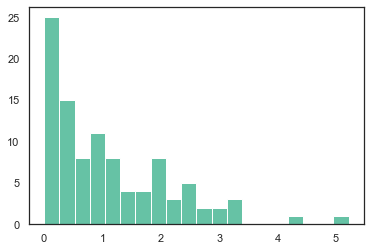

In [79]:
Exp_1 = sps.expon.rvs(0,1,100)
plt.hist(Exp_1,bins = 20)
plt.plot()

Посчитайте значения плотности этого распределения на промежутке от 0 до 6.

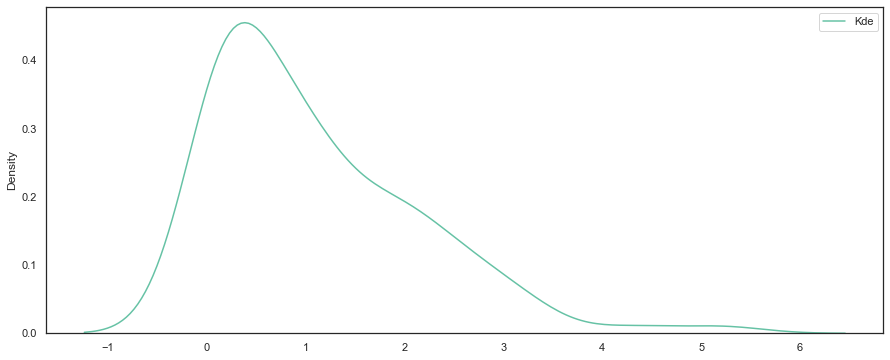

In [80]:
plt.figure(figsize=(15, 6))
sns.kdeplot(Exp_1[Exp_1 <= 6], label = 'Kde')
plt.legend()

Нарисуйте гистограмму и ядерную оценку плотности для выборки из сгененированного экспоненциального распределения.

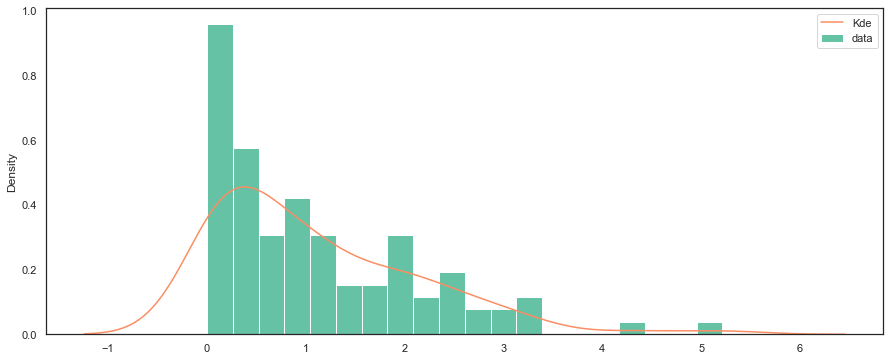

In [81]:

plt.figure(figsize=(15, 6))
plt.hist(Exp_1[Exp_1 <= 6], bins = 20, density = True, label = 'data'
        )
sns.kdeplot(Exp_1[Exp_1 <= 6], label = 'Kde')
plt.legend()

Как вы думаете, почему ядерная оценка плотности так плохо приближает реальную плотность распределения?

**Ответ: Думаю, на это есть две причины:**

**1) Потому что у нас слишком мало данных. Ядерное сглаживание работает при n -> $\infty$, 100 это слишком мало.
Есть оценка $Ef_n(x) - > f(x), n -> \infty $, То есть ядерная оценка плотности в точке является ассимптотически несмещенной**

**2) Даже при больших значениях n есть фундаментальная неточность около 0: функция распределения не непрерывна в 0, в то время как мы приближаем ее бесконечно дифференцируемой функцией. Т.е мы всегда будем иметь "хвост" в начале**


Нарисуйте гистограммы и ядерные оценки плотности для исследуемых признаков

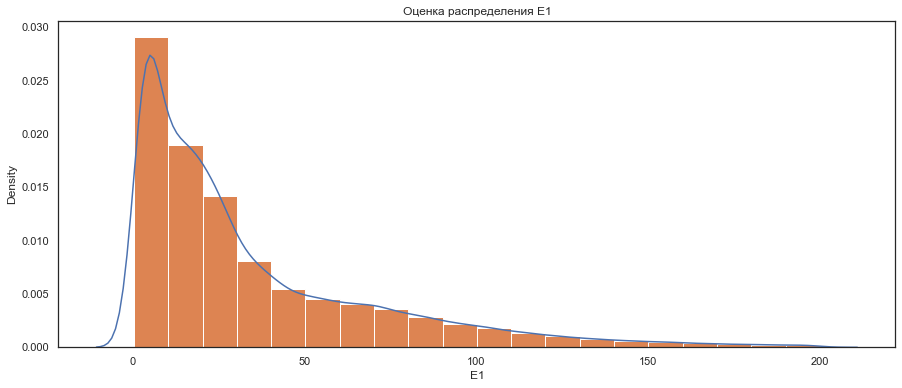

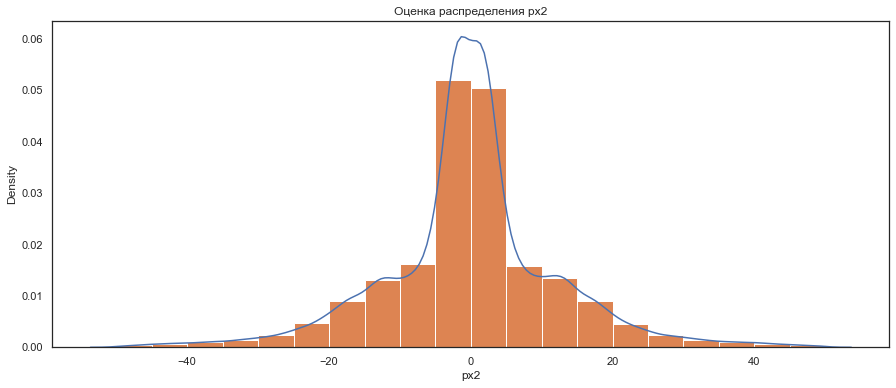

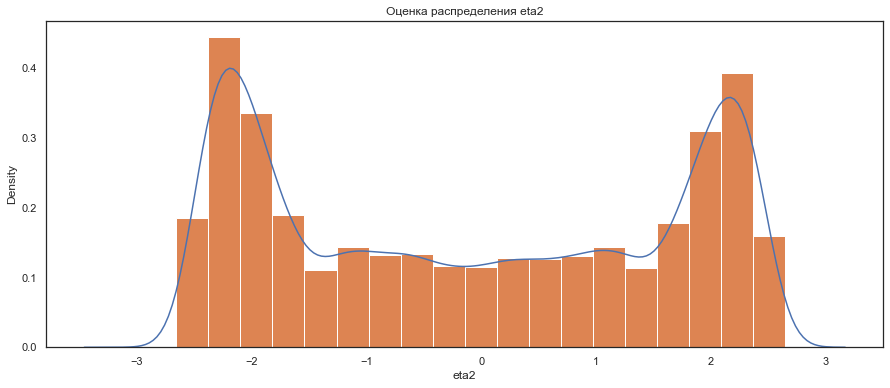

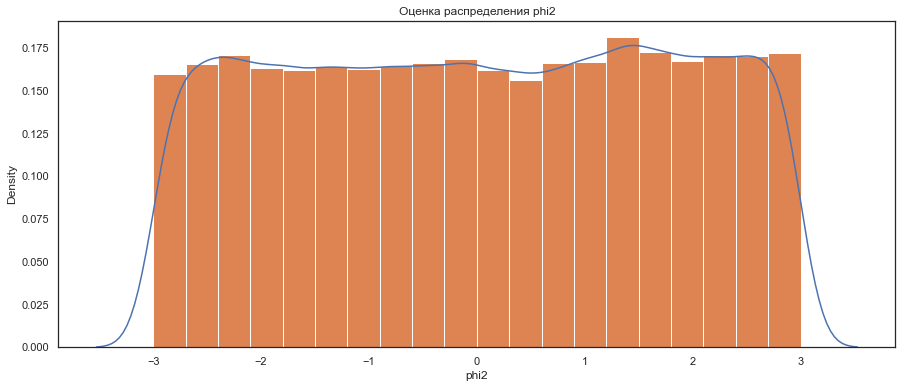

In [222]:
df_chosen_columns_wo = dict.fromkeys(['E1','px2','eta2','phi2'])
                                     
for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    
    # для каждого признака оставьте значения внутри ранее заданного промежутка column_range
    df_chosen_columns_wo[column] = (df_chosen_columns[column][(df_chosen_columns[column] <= column_range[1]) &
                                                          (df_chosen_columns[column] >= column_range[0])
                                                         ])
    
    sns.kdeplot(df_chosen_columns_wo[column])
    plt.hist(df_chosen_columns_wo[column],density = True, bins = 20 )
    plt.title('Оценка распределения ' + column)

**Сделайте выводы.** Какой из двух видов графиков более нагляден для данных выборки? Какими свойствами должно обладать распределение признака, чтобы ядерная оценка плотности, полученная по выборке, была похожа на настоящую плотность? 

**Вывод: Я думаю, что в разных случаях по разному. Если в некоторой области истинная плотность достаточно плавна и выборка достаточна велика, то ядерная оценка довольно неплохо показывает поведение реальной плотности, что очень наглядно. Но например в области разрывности, без гистограммы не обойтись, так как она более точно покажет, где находится этот разрыв, в то время как ядерная плотность будет плавно менятся. Для маленькой выборки данных я бы использовал гистограмму, так как ядерная оценка там очень плохо работает. Кроме того, ядерная оценка показывает, где находится выборс**

Здесь мы "избавились" от выбросов для того, чтобы понять, как распределена бОльшая часть выборки.

Но нужно понимать, что избавляться от выбросов при анализе данных стоит не всегда.
Прежде, чем удалять выбросы из выборки, хорошо бы понимать:
1. **Какая цель исследования**. Например, если мы хотим узнать, как хорошо "средний" студент МФТИ решает задачи по теории вероятностей, результаты лучших студентов на потоке не сильно проясняют ситуацию и затрудняют анализ. Такие результаты нужно выкинуть. Если же надо отобрать студентов на стажировку для аналитиков данных, хорошие результаты не только не нужно отсеивать, но и нужно анализировать дополнительно.
2. **Почему** отличающееся значение могло появиться в выборке. Это случайность / ошибка в измерениях / следствие какого-то еще фактора? Возможно, удаление отличающегося элемента лишит нас важных знаний о природе исследуемых данных.



**Приведите примеры исследований**, в которых нужно/не нужно удалять выбросы в данных:

**Нужно**:

Ошибочное измерение

Во многих эксперементах по анализу распределения элементарных частиц по углам, есть часть частиц, которая меняет свое направление около детектора, в следствие маловероятного рассеяния на воздухе, эти данные являются паразитными

В некторых больших базах данных появляются не совсем верные результаты: я читал статью, где для борьбы с этим пользовались известной связью между атомным весом и критической температурой, некоторые точки, совсем не подходящие по эту зависимость, убирались. 

**Не нужно**:

Бывает, что предметом исследования являются "выборсы". Например, по засеканию на детекторе фотонов, не характерной часостоы (в зависимости от угла), можно сделать выводы об отражении излучения в лабаратории

Выборс может таковым не быть, а полноценно участвовать в распределении, показывая какой-то эффект

Исследование аномалий. Например, изучение по признаку роста высоких людей

**Сделайте выводы по всей задаче:**

Можно сделать несколько выводов: 

1) Мы убрали некоторые "лишние точки", в зависимости от наших целей и от их природы, возможно не стоило этого делать. Но если предположить, что это не важные для нас данные, без них гисторгаммы и оценки плотностей вероятности получаются намного информативнее. За ними нужно следить.

2) При визулиции данных нужно пользоваться как гистограмой так и ядерной оценкой. Вторая показывает как бы среднее гладкое поведение истинной плотности, а гистограмма указывает на случайный разборс данных и точки разрывности\не плавного поведения. Кроме того, ядерная оценка показывает, где находится выборс 

### Задача 2

В этой задаче нужно визуализировать *центральную предельную теорему*.



*a).* Пусть $\xi_1, ..., \xi_n$ — независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\to} \mathcal{N}(0, 1)$, где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$ (то есть 500 реализаций выборок размера 300). 

In [201]:
size_s = 300 # размер выборки
samples_count = 500 # количество выборок

sample = sps.expon.rvs(size=(500,300))



По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. 

In [202]:
sums = np.zeros((samples_count, size_s))
for i in range(samples_count):
    for j in range(size_s):
        sums[i][j] = np.sum(sample[i,0:j])

Для этого среднего посчитайте величину $Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}$.

*Подсказка: можно воспользоваться возможностями библиотеки `numpy`.*

In [203]:
M = np.array([i for i in range(1,301)]*500).reshape((500,300))
D = M 
M

array([[  1,   2,   3, ..., 298, 299, 300],
       [  1,   2,   3, ..., 298, 299, 300],
       [  1,   2,   3, ..., 298, 299, 300],
       ...,
       [  1,   2,   3, ..., 298, 299, 300],
       [  1,   2,   3, ..., 298, 299, 300],
       [  1,   2,   3, ..., 298, 299, 300]])

In [204]:
Z = (sums - M)/np.sqrt(D)

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

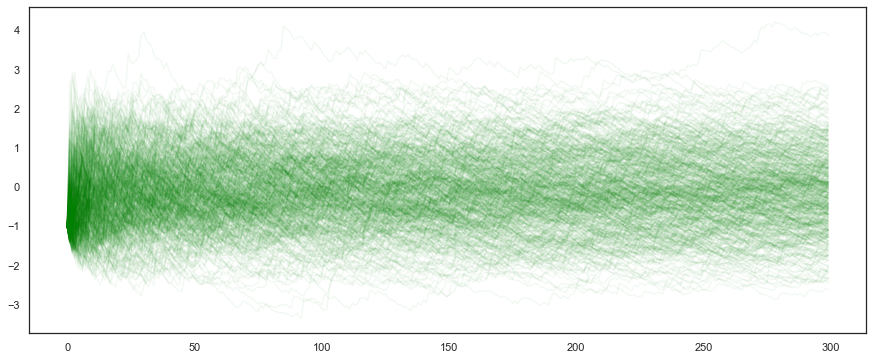

In [205]:
plt.figure(figsize=(15, 6))
for i in range(500):
    plt.plot(Z[i],alpha=0.05, color = 'green')


Нет, не сходятся,но мат. ожидание, кажется, 0, но это не является следствием цпт., так как там сходимость по распределению


Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$, которую тоже постройте на том же графике? Не забудьте сделать легенду (подписи на графиках, см. семинар и туториалы).

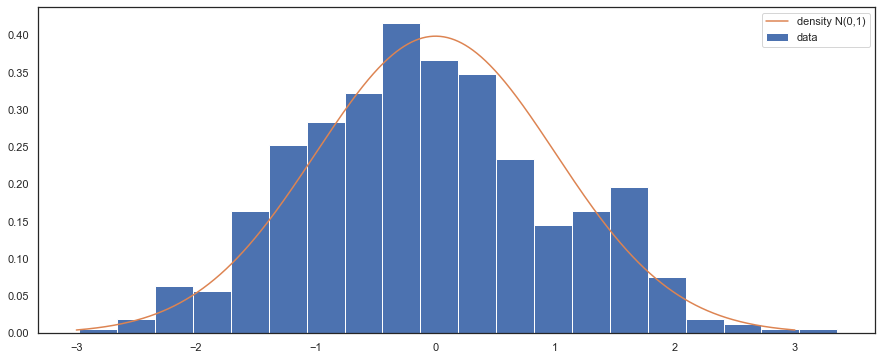

In [198]:
grid = np.linspace(-3,3,1000)
plt.figure(figsize=(15, 6))

plt.hist(Z[:,-1], bins = 20, label = 'data',density = True)
plt.plot(grid,sps.norm.pdf(grid),label = 'density N(0,1)')
plt.legend()

Распределение действительно похоже на нормальное. Мат. ожидание близко к 0. Но все же есть заметные отклонения. При увеличении n оно все больше будет похоже на нормальное, вследствие поточечной сходимости(распределений а не плотности вероятности).




*b).* Выполните те же действия для распределения $Pois(1)$.


Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

Для Pois(1):

In [215]:
sample_p = sps.poisson.rvs(size=(500,300), mu =1)

sums_p = np.zeros((samples_count, size_s))
for i in range(samples_count):
    for j in range(size_s):
        sums_p[i][j] = np.sum(sample_p[i,0:j])
Z_p = (sums_p - M)/np.sqrt(D)

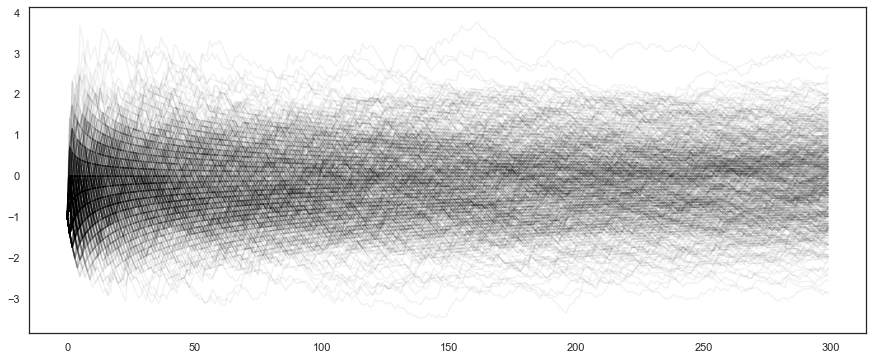

In [216]:
plt.figure(figsize=(15, 6))
for i in range(500):
    plt.plot(Z_p[i],alpha=0.05, color = 'black')

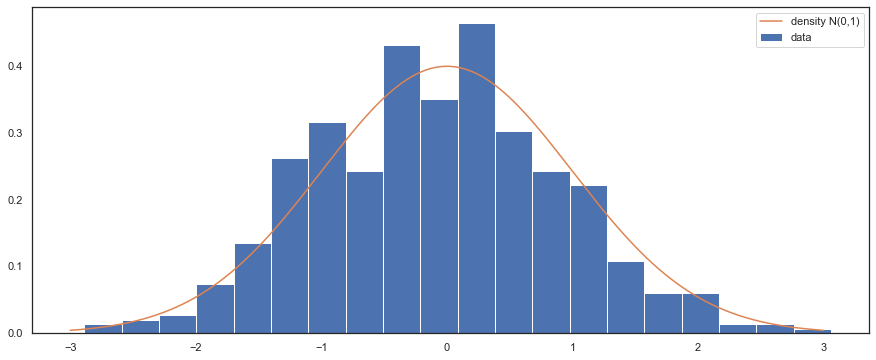

In [217]:
grid = np.linspace(-3,3,1000)
plt.figure(figsize=(15, 6))

plt.hist(Z_p[:,-1], bins = 20, label = 'data',density = True)
plt.plot(grid,sps.norm.pdf(grid),label = 'density N(0,1)')
plt.legend()

Пуассон оказался больше похож, на нормальное распределение

Смысл центральной теоремы в том, что сумма случайных одинаково расрпедленных независимых величин сходиться по распределению к нормальному. Причем сходимость по распределению довольно слаба. Из нее следует поточечная сходимость функции расрпделения в точках непрерывности, но не следует сохранение мат. ожидания и сходимости плотности вероятности. Можно сказать, что плотность распределения становится все более "похожей" на нормальное

Мы проверили это утверждение для двух разных расрпедлений. Абсолютно неперывного, дискретного. В обоих случаях наше распределение на 300 размере выборки было весьма похоже на нормальное